# Autómata finito no determinístico con transición epsilón

Ejemplifica la creación de un autómata finito no determinístico con transición epsilón

In [1]:
import os
import sys

In [2]:
from maquinas.regular.ndfa_e import NonDeterministicFiniteAutomaton_epsilon as NDFA_e
from maquinas.simulation import Simulation

In [3]:
# Creating automata finito
bes_pares=NDFA_e(Q=['q_0','q_1'],
                         sigma=['a','b'],
                         q_0='q_0',
                         A=['q_0'],
                         delta=[
                            (('q_0','ε'),['q_0']),
                            (('q_0','a'),['q_0']),
                            (('q_1','b'),['q_0']),
                            (('q_1','a'),['q_1']),
                            (('q_0','b'),['q_1']),
                         ])

In [4]:
print(bes_pares.summary())

States  : q_0, q_1
Sigma   : ε, a, b
Initial : q_0
Aceptors: q_0
Transitions:
 q_0,ε → ('q_0',)
 q_0,a → ('q_0',)
 q_0,b → ('q_1',)
 q_1,b → ('q_0',)
 q_1,a → ('q_1',)


In [5]:
for q,a,w_ in bes_pares.delta_stepwise("bbaabbbaaaaaaaabaaaaab"):
    if a:
        print(f"{a} -> {q}", end=",\n ")
    else:
        print(f"{q}",end="\n ")
    res=q
    
print(f"\nCon {res} Se acepta?", "Sí" if bes_pares.acceptor(res) else "No" )

{'q_0'}
 b -> {'q_1'},
 b -> {'q_0'},
 a -> {'q_0'},
 a -> {'q_0'},
 b -> {'q_1'},
 b -> {'q_0'},
 b -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 a -> {'q_1'},
 b -> {'q_0'},
 a -> {'q_0'},
 a -> {'q_0'},
 a -> {'q_0'},
 a -> {'q_0'},
 a -> {'q_0'},
 b -> {'q_1'},
 
Con {'q_1'} Se acepta? No


In [6]:
res=bes_pares.delta_extended(None,"bbaabbbaaaaaaaabaaaaab")
print(f"\nCon {res} Se acepta?", "Sí" if bes_pares.acceptor(res) else "No" )


Con {'q_1'} Se acepta? No


In [7]:
res=bes_pares.delta_extended(None,"bbaabbbaaaaaaaabaaaaa")
print(f"\nCon {res} Se acepta?", "Sí" if bes_pares.acceptor(res) else "No" )


Con {'q_0'} Se acepta? Sí


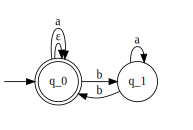

In [8]:
bes_pares.graph()

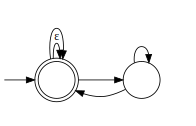

In [9]:
bes_pares.graph(symbols={'a':'🌵','b':'🌴'},states={'q_0':'🤣','q_1':'🤗'})

In [10]:
s=Simulation(bes_pares,"bbaabbbaaaaaaaabaaaaa")
s.run()

In [11]:
bes_pares.table(symbols={'a':'🌵','b':'🌴'},states={'q_0':'🤣','q_1':'🤗'})

In [12]:
bes_pares.add_state('q_2')
bes_pares.reachable_states()

{'q_0', 'q_1'}

In [13]:
bes_pares.unreachable_states()

{'q_2'}